<font size="6"> Part V Assignment 2: Allee effect</font>

$$\require{mhchem}$$   
We have looked at logistic growth where there is a interaction between bacteria that causes death $X + X \rightarrow X$. This models competition due to limited resources. Another interesting behaviour can occur in some populations, for example certain fish populations, where the population growth slows at very low densities ie. the population requires a minimum density to be able to reproduce successfully. This is known at the Allee effect. 

The logistic growth equation can be modified to include the Allee effect as follows

$$ \frac{dN}{dt} = kN \big(1 - \frac{N}{C} \big) \big( \frac{N}{A} - 1 \big) $$

where $N$ is the population level, $C$ is the carrying capacity and $A$ is a term quantifiying the minimum population size required for growth. 

1) Write some code to implement this model. Assume that $k=0.03$, $C=1000$ and $A=500$ and plot a time series over 600 minutes. Explore what happens as you change the initial condition $N_0$. <br>
Hint: it might be easier to see what is going on using fixed y limits from 0 to 1500 (use `pyplot.ylim` )


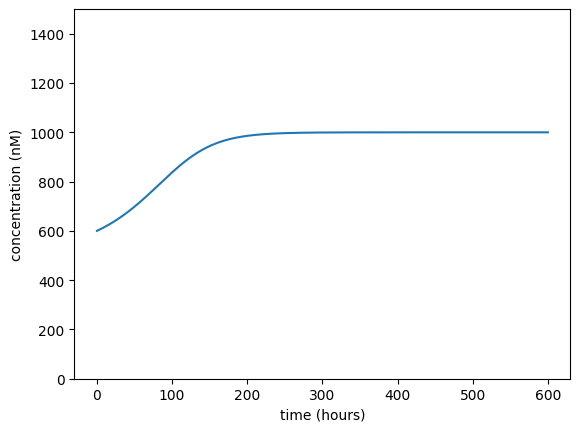

In [6]:
## SOLUTION

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dallee(y, t, p):
    X  = y[0]  # bacteria

    # assign parameters
    k = p[0]
    C  = p[1]
    A = p[2]

    dX  = k*X*(1-X/C)*(X/A - 1)

    return [dX]

# define parameter vector
theta = [0.03, 1000, 500]

# define the time range that we want to integrate
times = np.arange(0,600,0.1)

# initial conditions
y0 = 600

# perform the ode integration
yobs = odeint(dallee, y0, times, args=(theta,)  )

# make a plot
plt.close()  # close any existing

plt.plot( times, yobs )
plt.ylim(0, 1500)
plt.xlabel('time (hours)')
plt.ylabel('concentration (nM)')
plt.savefig('plot-allee.png')
plt.show()

2. Modify your code to plot 12 trajectories with $N_0$ ranging from 0 to 1500 equally spaced. Change the maximum time to 300 mins. Save your plot as a pdf. <br>
Hint: use the `numpy.linspace` function and a `for` loop

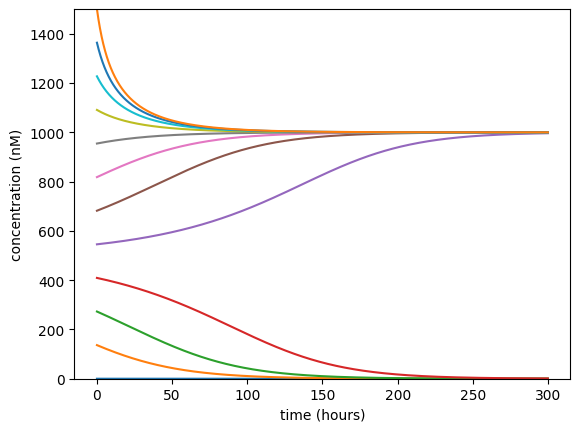

In [7]:
## SOLUTION

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dallee(y, t, p):
    X  = y[0]  # bacteria

    # assign parameters
    k = p[0]
    C  = p[1]
    A = p[2]

    dX  = k*X*(1-X/C)*(X/A - 1)

    return [dX]

# define parameter vector
theta = [0.03, 1000, 500]

# define the time range that we want to integrate
times = np.arange(0,300,0.1)

# initial conditions
y0s = np.linspace(0,1500,12)

# make a plot
plt.close()  # close any existing

for i in np.arange(0,len(y0s)):
    # perform the ode integration
    yobs = odeint(dallee, y0s[i], times, args=(theta,)  )
    plt.plot( times, yobs )

plt.ylim(0, 1500)
plt.xlabel('time (hours)')
plt.ylabel('concentration (nM)')
plt.savefig('plot-allee.pdf')
plt.show()

3) Reason what is happening in this model

4) By examining the model, argue that the steady states of this system are at $N=0$, $N=C$ and $N=A$. 

$$ \frac{dN}{dt} = kN \big(1 - \frac{N}{C} \big) \big( \frac{N}{A} - 1 \big) $$

Steady state when $\frac{dN}{dt} = 0$


When $N=0$; $kN = 0$<br>
When $N=C$; $\big(1 - \frac{N}{C} \big) = 0$<br>
When $N=A$; $\big( \frac{N}{A} - 1 \big) = 0$<br>

The first two steady states are called **attractors** since nearby trajectories move towards them. The steady state at $N=A$ forms the boundary of **basins of attraction**. If $N_0 > A$ the system moves towards $N=C$. If $N_0 < A$ then the system moves towards $N=0$.

5) What happens when $N_0=A$?

What you should see is that when $N_0=A$ the system remains there. However, if $N_0$ is slightly bigger or smaller than $A$ then the trajectories move away from it (try it!). The point $N=A$ is known as an **unstable steady state**